In [1]:
import pandas as pd
import numpy as np
import random
import time
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_data = pd.read_csv('./data/titanic.csv')

In [3]:
df_data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass      1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
survived    1309 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [5]:
data = df_data.dropna()

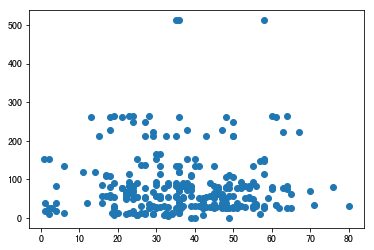

In [6]:
plt.scatter(data['age'], data['fare'])

In [7]:
age_with_fares = data[((data['age'] > 10) & (data['age'] < 30) & (data['fare'] > 20) & (data['fare'] < 100)) |
                      ((data['age'] >= 30) & (data['age'] < 70) & (data['fare'] >= 100) & (data['fare'] < 250))]
sub_fare = age_with_fares['fare']
sub_age = age_with_fares['age']

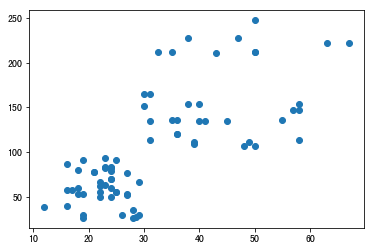

In [8]:
plt.scatter(sub_age, sub_fare)

## 1. Random Choose Method to get optimal k and b

In [9]:
def func(age, k, b):
    return age * k + b

In [10]:
def loss(y, y_hat):
    return np.mean(np.abs(y - y_hat))
#     return np.mean(np.sqrt(y - y_hat))

In [11]:
epochs = 20
losses = []

Current Best Result at epoch 0: y(age) = 3 * age + -7 with error rate 32.1275
Current Best Result at epoch 6: y(age) = 3 * age + 1 with error rate 30.7448
Current Best Result at epoch 18: y(age) = 3 * age + 6 with error rate 30.6248



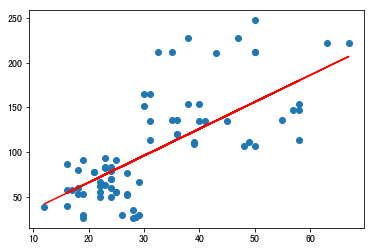

In [12]:
min_error_rate = float('inf')
plt.scatter(sub_age, sub_fare)
for epoch in tqdm_notebook(range(epochs)):
    random.random() * 20
    k_hat = random.randint(-10, 10)
    b_hat = random.randint(-10, 10)

    y_hat = func(sub_age, k_hat, b_hat)
    error_rate = loss(sub_fare, y_hat)
    losses.append(error_rate)
    
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = k_hat, b_hat
        print(
            "Current Best Result at epoch {}: y(age) = {} * age + {} with error rate {:.4f}"
            .format(epoch, best_k, best_b, min_error_rate))
plt.plot(sub_age, best_k*sub_age+best_b, c='r')
plt.show()
# plt.plot(range(len(losses)), losses)
# plt.show()

## 2. Supervised Direction to get optimal k and b

In [13]:
change_directions = [
    # (k, b)
    (+1, -1),  # k increase, b decrease
    (+1, +1),
    (-1, +1),
    (-1, -1)  # k decrease, b decrease
]

In [14]:
def step():
    return random.random() * 1

Current Best Result at epoch 0: y(age) = 5.312737727983733 * age + -3.3199037764293693 with error rate 65.4473
Current Best Result at epoch 1: y(age) = 4.83348571266678 * age + -3.387269914756154 with error rate 53.2004
Current Best Result at epoch 2: y(age) = 4.321414480807364 * age + -3.430020838824876 with error rate 42.0492
Current Best Result at epoch 3: y(age) = 4.153779566111982 * age + -3.9729654578679217 with error rate 38.6588
Current Best Result at epoch 4: y(age) = 3.2033556937044088 * age + -4.280744658846789 with error rate 30.6931
Current Best Result at epoch 15: y(age) = 3.363802660339877 * age + -4.552177769257382 with error rate 30.4770
Current Best Result at epoch 31: y(age) = 3.391821342656746 * age + -5.073111912625903 with error rate 30.4708



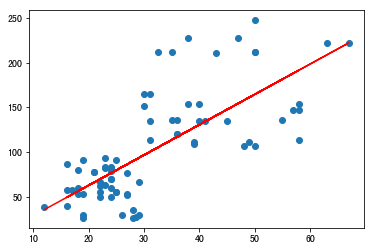

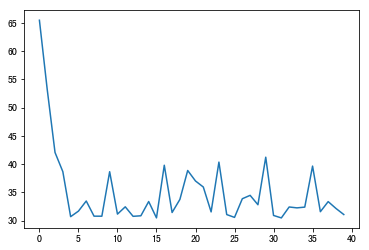

In [15]:
best_direction = random.choice(change_directions)
random.random() * 20
best_k = random.randint(-10, 10)
best_b = random.randint(-10, 10)

min_error_rate = float('inf')

epochs = 40
losses = []
for epoch in tqdm_notebook(range(epochs)):
    
    k_delta_direction, b_delta_direction = best_direction
    k_delta, b_delta = k_delta_direction * step(), b_delta_direction * step()
    
    new_k_hat, new_b_hat = best_k + k_delta, best_b + b_delta
    y_hat = func(sub_age, new_k_hat, new_b_hat)
    error_rate = loss(sub_fare, y_hat)
    losses.append(error_rate)
    
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_direction = (k_delta_direction, b_delta_direction)
        best_k, best_b = new_k_hat, new_b_hat
        print(
            "Current Best Result at epoch {}: y(age) = {} * age + {} with error rate {:.4f}"
            .format(epoch, best_k, best_b, min_error_rate))
    else:
        best_direction = random.choice(change_directions)
        
plt.scatter(sub_age, sub_fare)        
plt.plot(sub_age, best_k * sub_age + best_b, c='r')
plt.show()
plt.plot(range(len(losses)), losses)
plt.show()

## 3.Gradient Descent to get optimal k and b

In [16]:
def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

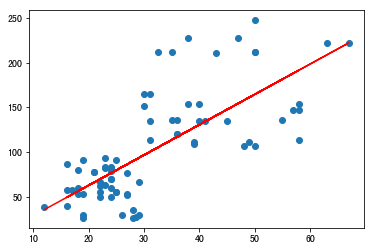

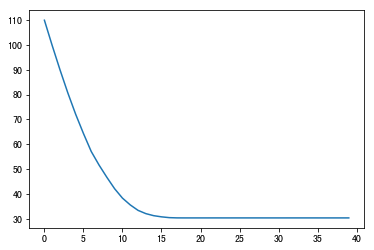

In [17]:
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

learing_rate = 1e-2

epochs = 40
losses = []
for epoch in tqdm_notebook(range(epochs)):
    
    k_delta = -1 * learing_rate * derivate_k(sub_fare, func(sub_age, k_hat, b_hat), sub_age)
    b_delta = -1 * learing_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat))
    
    k_hat += k_delta
    b_hat += b_delta
    y_hat = func(sub_age, k_hat, b_hat)
    error_rate = loss(sub_fare, y_hat)
    losses.append(error_rate)
        
plt.scatter(sub_age, sub_fare)        
plt.plot(sub_age, best_k * sub_age + best_b, c='r')
plt.show()
plt.plot(range(len(losses)), losses)
plt.show()